In [1]:
import pandas as pd
import numpy as np

In [2]:
vehiculos = pd.read_csv('datasets/vehiculos_procesado.csv',
                       usecols = ['consumo', 
                                  'cilindros', 
                                  'desplazamiento', 
                                  'co2'])
litros_por_galon = 3.78541
vehiculos['consumo_litros_milla'] = litros_por_galon/vehiculos.consumo

In [3]:
vehiculos.shape

(35539, 5)

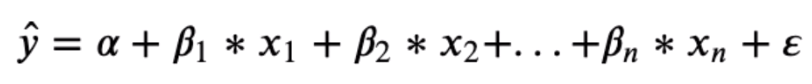

In [4]:
from IPython.display import Image
Image('reg_lineal.png')

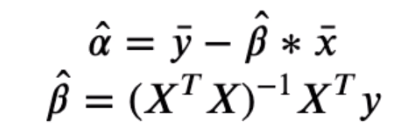

In [5]:
Image('error_ols.png')

In [6]:
pct_entrenamiento = 0.8
vehiculos_train = vehiculos.sample(frac=pct_entrenamiento)
vehiculos_test = vehiculos[~vehiculos.index.isin(vehiculos_train.index)] 
# la tilde '~' es como un 'not', en este caso, seria como decir 'is not in' 

print(vehiculos_train.shape)
print(vehiculos_test.shape)

(28431, 5)
(7108, 5)


In [7]:
variables_independientes = ['desplazamiento', 'cilindros', 'consumo_litros_milla']
variable_dependiente = 'co2'

# 'values' asigna la forma de una matriz (hace un array de arrays)
# 'as_matrix' deprecated, ahora se usa 'values'
X = vehiculos_train[variables_independientes].values 
y = vehiculos_train[variable_dependiente].values

In [8]:
X.shape

(28431, 3)

In [9]:
y.shape

(28431,)

In [10]:
X_T = X.T
X_T.shape

(3, 28431)

In [11]:
# calcular la inversa de la transpuesta 'np.linalg.inv(X_T @ X)'
# caLculo de los coeficientes beta
betas = np.linalg.inv(X_T @ X) @ X_T @ y
betas

array([ 3.87021491e+00, -6.10424199e-01,  2.30447516e+03])

In [12]:
# 'vehiculos_train[variables_independientes].mean().values' = esto es 'x raya'
# calculo del alfa
alfa = y.mean() - np.dot(betas, vehiculos_train[variables_independientes].mean().values)
alfa

0.37116159097985246

In [13]:
def predecir(r):
    return alfa + np.dot(betas, r.values) # y = alfa + beta * x_raya, se despeja 'y'

In [14]:
vehiculos_train['co2_pred'] = vehiculos_train[variables_independientes].apply(
    predecir, axis=1) 
# '.apply(predecir, axis=1') = aplicar la funcion solo a nivel de columnas del df (var indeps)

In [15]:
vehiculos_train

,desplazamiento,cilindros,consumo,co2,consumo_litros_milla,co2_pred
32007,3.0,6.0,19,467.736842,0.199232,467.444700
5118,2.0,4.0,24,370.291667,0.157725,369.144200
1520,1.8,4.0,19,467.736842,0.199232,464.021290
22661,1.8,4.0,27,329.148148,0.140200,327.984123
1290,4.0,8.0,20,441.000000,0.189271,447.137794
...,...,...,...,...,...,...
12829,5.0,8.0,12,740.583333,0.315451,741.787453
20826,3.5,6.0,21,413.000000,0.180258,425.653575
26403,3.5,6.0,22,413.000000,0.172064,406.771793
7792,4.2,6.0,16,555.437500,0.236588,558.174977


In [16]:
vehiculos_test['co2_pred'] = vehiculos_test[variables_independientes].apply(predecir, axis=1) 

C:\Users\patri\AppData\Local\Temp/ipykernel_22808/2611160158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehiculos_test['co2_pred'] = vehiculos_test[variables_independientes].apply(predecir, axis=1)


In [17]:
vehiculos_test

,desplazamiento,cilindros,consumo,co2,consumo_litros_milla,co2_pred
12,2.3,4.0,24,370.291667,0.157725,370.305265
14,2.5,5.0,20,444.350000,0.189271,443.163744
22,3.2,6.0,21,423.190476,0.180258,424.492510
31,3.5,6.0,19,467.736842,0.199232,469.379807
52,1.6,4.0,25,355.480000,0.151416,353.057142
...,...,...,...,...,...,...
35503,2.3,4.0,19,467.736842,0.199232,465.956398
35513,2.9,6.0,15,592.466667,0.252361,589.491128
35515,2.9,6.0,15,592.466667,0.252361,589.491128
35517,5.6,8.0,13,683.615385,0.291185,688.190458


In [18]:
# encontrar el error
def error_cuadratico_medio(y, y_pred):
    return np.sum((y - y_pred)**2)/len(y)
    

In [19]:
error_test = error_cuadratico_medio(vehiculos_test.co2, vehiculos_test.co2_pred)
error_test

103.22775618865607